In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [42]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/datasets/diabetes/employees.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
data

,serial,name,designation,join date,university,salary,gender,age
0,1,mynul,system analyst,14/4/2013,JU,30000,M,45
1,2,mahbub,project manager,8/8/2022,CU,20000,M,42
2,3,bappy,HR,14/4/2018,DU,15000,M,34
3,4,shafiq,Sr. Software Engineer,17/8/2022,SEU,18000,M,30
4,5,arif,Sr. Software Engineer,8/10/2022,SCU,16000,M,27
5,6,sadia,SQA,1/7/2022,DIU,12000,F,26
6,7,sarfaraz,Jr. Software Engineer,19/8/2022,BU,12000,M,23
7,8,kawsar,Jr. Programmer,8/1/2022,BU,8000,M,23
8,9,nahid,Frontend Developer,1/8/2021,DU,10000,M,24
9,10,mustafizur,CEO,14/4/2012,JU,45000,M,45


In [44]:
total_employees = data.shape[0]

In [45]:
total_employees

10

In [46]:
data.describe()

,serial,salary,age
count,10.00000,10.00000,10.000000
mean,5.50000,18600.00000,31.900000
std,3.02765,11167.41291,9.024042
min,1.00000,8000.00000,23.000000
25%,3.25000,12000.00000,24.500000
50%,5.50000,15500.00000,28.500000
75%,7.75000,19500.00000,40.000000
max,10.00000,45000.00000,45.000000


In [47]:
gender_counts= data['gender'].value_counts()

In [48]:
gender_counts

M    9
F    1
Name: gender, dtype: int64

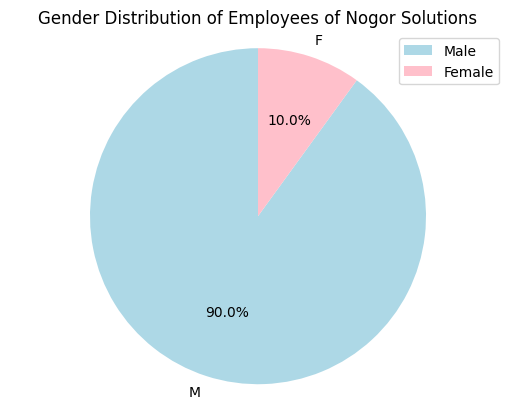

In [49]:
#labels will get the unique index  from the gender feature for example F,M
labels = gender_counts.index.tolist()
#values will get the unique index value from the gender feature how many data exists for male and female eg. 9,1
values = gender_counts.values.tolist()

colors = ['lightblue', 'pink']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution of Employees of Nogor Solutions')

# Add legend
legend_labels = ['Male', 'Female']
legend_colors = ['lightblue', 'pink']
patches = [plt.Rectangle((0,0),1,1,fc=color) for color in legend_colors]
plt.legend(patches, legend_labels, loc="best")

plt.show()

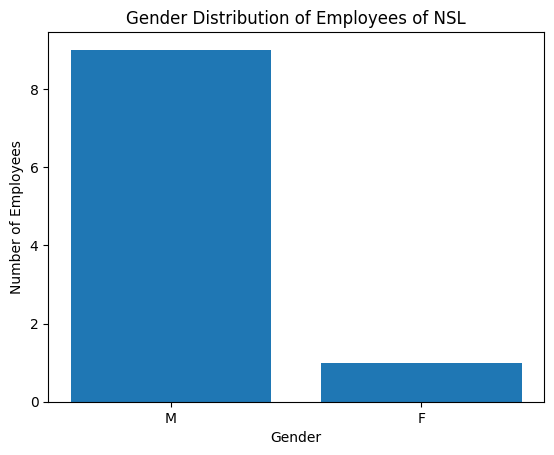

In [50]:
# Count the number of employees by gender
gender_counts = data['gender'].value_counts()

# Create a bar chart of the gender counts
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.title('Gender Distribution of Employees of NSL')

plt.show()

We have employees of universities: 7


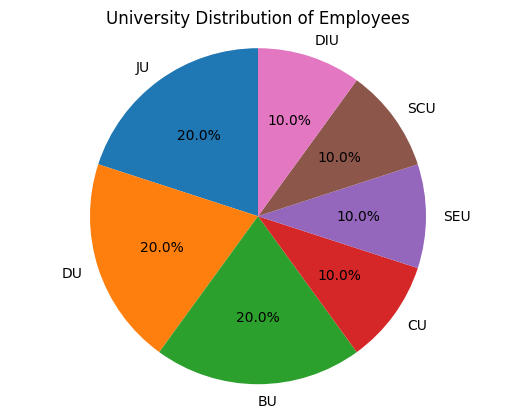

In [51]:
# Count the number of employees by university
univ_counts = data['university'].value_counts()

# Print the number of universities
print('We have employees of universities:', len(univ_counts))

# Display the distribution of universities in a pie chart
labels = univ_counts.index.tolist()
sizes = univ_counts.values.tolist()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('University Distribution of Employees')

plt.show()


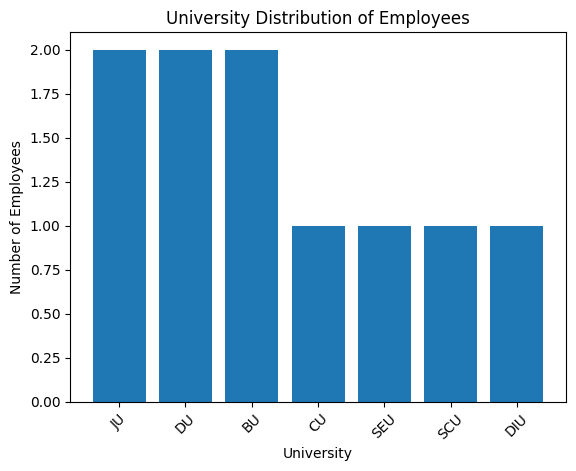

In [52]:
# Count the number of employees by university
univ_counts = data['university'].value_counts()

# Create a bar chart of the university counts
plt.bar(univ_counts.index, univ_counts.values)
plt.xticks(rotation=45)
plt.xlabel('University')
plt.ylabel('Number of Employees')
plt.title('University Distribution of Employees')

plt.show()


In [55]:
# Convert the join date column to datetime format
data_sorted['join date'] = pd.to_datetime(data_sorted['join date'], format='%d/%m/%Y', errors='coerce')

# Sort the dataframe based on 'join date' column
df_sorted = data_sorted.sort_values(by='join date')

# Select the first row of the sorted dataframe
oldest_employee = df_sorted.iloc[0]

# Calculate how many years the oldest employee has been with the company
join_date = oldest_employee['join date']
years_of_service = (pd.Timestamp.now() - join_date).days / 365

# Print the information of the oldest employee and their years of service
print("Information of the oldest employee:")
print(oldest_employee)
print("Years of service:", years_of_service)


Information of the oldest employee:
serial                          10
name                    mustafizur
designation                    CEO
join date      2012-04-14 00:00:00
university                      JU
salary                       45000
gender                           M
age                             45
Name: 9, dtype: object
Years of service: 11.043835616438356


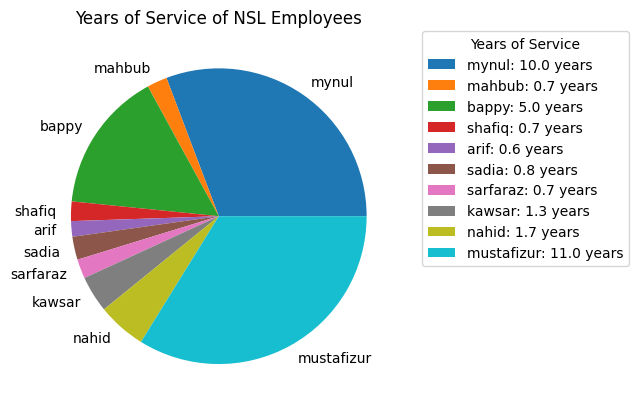

In [61]:
import matplotlib.pyplot as plt

# Convert the join date column to datetime format
data['join date'] = pd.to_datetime(data['join date'], format='%d/%m/%Y', errors='coerce')

# Calculate the years of service for each employee
data['years of service'] = (pd.Timestamp.now() - data['join date']).dt.days / 365

# Create a pie chart
plt.pie(data['years of service'], labels=data['name'])
plt.title('Years of Service of NSL Employees')

# Get the years of service as a list
service_years = list(data['years of service'])

# Add the years of service to the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Years of Service',
           labels=[f'{name}: {years:.1f} years' for name, years in zip(data['name'], service_years)])

plt.show()


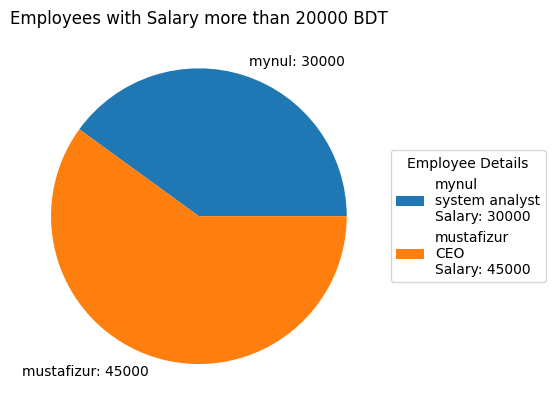

In [65]:
# Filter employees with salary greater than 20000
high_salary_data = data[data['salary'] > 20000]

# Create a pie chart
plt.pie(high_salary_data['salary'], labels=high_salary_data['name'] + ': ' + high_salary_data['salary'].astype(str))
plt.title('Employees with Salary more than 20000 BDT')

# Create legend
legend_labels = [f'{name}\n{designation}\nSalary: {salary}' for name, designation, salary in zip(high_salary_data['name'], high_salary_data['designation'], high_salary_data['salary'])]
plt.legend(title='Employee Details', labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
